<a href="https://colab.research.google.com/github/wsamuelw/review-data-using-SVC/blob/main/2%2C%20review_data_using_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import lib required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# copy raw github link
url = 'https://raw.githubusercontent.com/wsamuelw/review-data-using-SVC/main/data/Restaurant_Reviews.csv'
df = pd.read_csv(url, sep='\t')

In [47]:
# glimpse the data
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


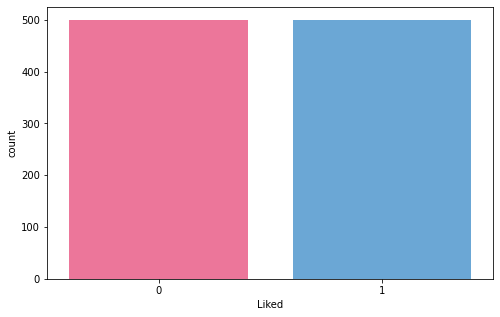

In [61]:
# visualise the Liked variable
# looks like they are 50% 50%
plt.figure(figsize = (8, 5))
sns.countplot(x = df.Liked, palette = ['#FF6392',"#5AA9E6"])


In [62]:
# define x and y
# y = the output
x = df['Review'].values
y = df['Liked'].values


In [63]:
# split the data into train and test
# try different seed
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)


In [64]:
print('The size of the train set is', x_train.shape, 'and', x_test.shape, 'for the test set')


The size of the train set is (750,) and (250,) for the test set


In [65]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')


In [66]:
count_matrix = vect.fit_transform(x_train)


In [67]:
count_array = count_matrix.toarray()


In [68]:
x_train_feature = pd.DataFrame(data = count_array, columns = vect.get_feature_names_out())


In [70]:
x_train_feature.head()

,00,10,100,11,12,15,17,1979,20,2007,...,yama,yeah,year,years,yellowtail,yelpers,yucky,yukon,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# tranform to vector
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)


In [72]:
# import support vector classifier (SVC)
from sklearn.svm import SVC
model = SVC()


In [73]:
# train the model
model.fit(x_train_vect, y_train)


SVC()

In [74]:
# predict the test results (the vect. version of the test set)
y_pred = model.predict(x_test_vect)


In [75]:
# evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)


0.72

In [76]:
# try some unseen text
unseen_text = vect.transform(["Good customer service! The food was nice and the waiting staff was cute"])


In [77]:
print('The prediction is', model.predict(unseen_text))


The prediction is [1]
